<a href="https://colab.research.google.com/github/benpettis/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Ben_Pettis_LS_DS14_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
# mean

In [0]:
import math
def mymean(sales):
  salessum = 0
  salesmean = 0
  for i in sales:
    salessum += i
  salesmean = salessum / len(sales)
  return salesmean

# variance
def myvar(sales):
  mean = [x - mymean(sales) for x in sales]
  square = [x**2 for x in mean]
  salesvar = sum(square)/(len(square)-1)
  return salesvar

#def stdev
def mystdev(sales):
  salesstdev = myvar(sales)
  salesstdev = math.sqrt(salesstdev)
  return salesstdev

In [0]:
mymean(sales)

3052.714285714286

In [0]:
myvar(sales)

214387.90476190473

In [0]:
mystdev(sales)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd
cust = [127, 80, 105, 92, 120, 115, 93]
lastweek = {'sales': sales, 'customers': cust}
lastweek = pd.DataFrame(lastweek)
lastweek.cov()
lastweekcov = lastweek.cov()

In [0]:
this = lastweekcov.iloc[0,1]
this

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
#import numpy as np
#np.std(cust)
custstd = mystdev(cust)
salesstd = mystdev(sales)

In [0]:
#sum of (x-meanx)(y-meany)/ n items in set
meansales = mymean(lastweek['sales'])
meancust = mymean(lastweek['customers'])
x = 0
y = 0
xy = 0
for i in lastweek:
  x = lastweek['sales']-meansales
  y = lastweek['customers']-meancust
  final = (x*y)/len(lastweek)
  
print(final)

0    1449.160350
1    2291.160350
2      -1.574344
3     457.446064
4    1426.670554
5     293.915452
6     601.241983
dtype: float64


In [0]:
this / (custstd*salesstd)

0.9628339778148909

In [0]:
lastweek.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
blah = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=[0])
blah.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# variance-covariance matrix 
blah.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
# correlation matrix
blah.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

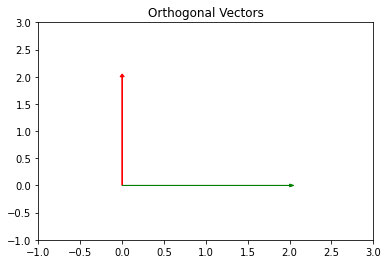

In [0]:
import matplotlib.pyplot as plt
# plotting two orthogonal vectors (synonym for right-angle)
one = [0, 2]
two = [2, 0]

plt.arrow(0,0, one[0], one[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, two[0], two[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not? 

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import numpy as np
a = np.array([[-5],
     [3],
     [-7]])
b = np.array([[6],
     [-8],
     [2]])
a.shape = 3
b.shape = 3
np.dot(a, b)


-68

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([[2], [-15], [6], [20]])
c.shape = 4
print(np.linalg.norm(c))
print(np.dot(c,c))
cT = c.T
#print(c*cT)
np.matmul(c, cT)

25.787593916455254
665


665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# horizontal vs sideways?!! why no arrow?
f = np.array([4, 12, 11, 9, 2])
fn = np.linalg.norm(f)
fu = f / fn
print(fu)


[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

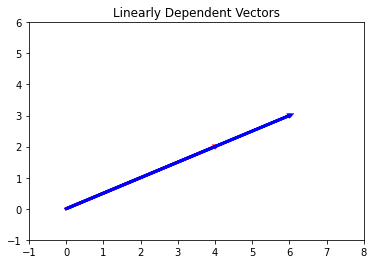

In [0]:
plt.xlim(-1,8)          
plt.ylim(-1,6)
plt.arrow(0,0, 4, 2, linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 6, 3, linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.title("Linearly Dependent Vectors")
plt.show()

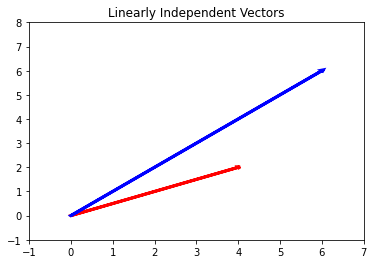

In [0]:
plt.xlim(-1,7)          
plt.ylim(-1,8)
plt.arrow(0,0, 4, 2, linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 6, 6, linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors? **$\mathbb{R}^2$**

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [74]:
# i don't understand this.
i_hat = [[1],
         [0]]

j_hat = [[0],
         [1]]

g = np.array([1])*i_hat+np.array([2])*j_hat
print(g)
h = np.array([4])*i_hat+np.array([8])*j_hat
print(h)

[[1]
 [2]]
[[4]
 [8]]


## 5.2 What is the span of $\{l, m, n\}$? **$\mathbb{R}^3$**

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [69]:
i_hat = np.array([[1],
         [0],
         [0]])
         

j_hat = np.array([[0],
         [1],
         [0]])

k_hat = np.array([[0],
         [0],
         [1]])

l = (1*i_hat)+(2*j_hat)+(3*k_hat)
print(l)
m = (-1*i_hat)+(0*j_hat)+(7*k_hat)
print(m)
n = (4*i_hat)+(8*j_hat)+(2*k_hat)
print(n)



[[1]
 [2]
 [3]]
[[-1]
 [ 0]
 [ 7]]
[[4]
 [8]
 [2]]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



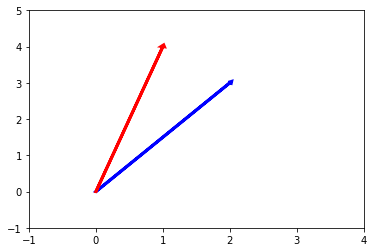

In [83]:
plt.xlim(-1,4)          
plt.ylim(-1,5)

# Plot Vectors
plt.arrow(0,0, 2, 3, linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, 1, 4, linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.show()

## 6.2 What does it mean to form a basis?

**Select a set vectors to denote a dimensional space (i.e., (0,1) and (1,0) for $\mathbb{R}^2$)**

# Rank

## 7.1 What is the Rank of P? $\mathbb{R}^2$

\begin{align}
 P = \begin{bmatrix}
  1 & 0 & 1 \\
  -2 & -3 & 1 \\
  3 & 3 & 0 
 \end{bmatrix}
\end{align}


In [84]:
P = np.array([[1,0,1],
              [-2,-3,1],
              [3,3,0]])

np.linalg.matrix_rank(P)

2

## 7.2 What does the rank of a matrix tell us?

**It tells us what dimensional space it can span.**

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()